In [ ]:
from skimage import data
rocket_image = data.rocket()

In [ ]:
from skimage import color
grayscale =color.rgb2gray(rocket_image)

In [ ]:
import matplotlib.pyplot as plt 

(-0.5, 639.5, 426.5, -0.5)

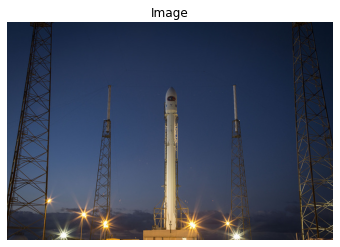

In [ ]:
plt.imshow(rocket_image, cmap="gray")
plt.title("Image")
plt.axis("off")

In [ ]:
from skimage import data

coffee_image = data.coffee()
coins_image = data.coins()

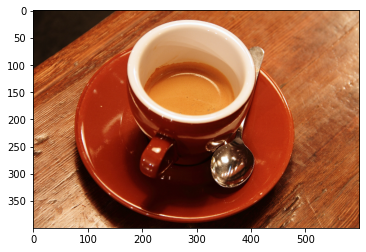

In [ ]:
plt.imshow(coffee_image)


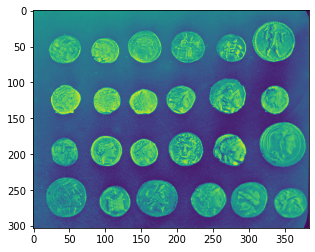

In [ ]:
plt.imshow(coins_image)


In [ ]:
#The above pictures are of different sizes


In [ ]:
coffee_image.shape

(400, 600, 3)

In [ ]:
coins_image.shape

(303, 384)

(427, 640, 3)


Text(0.5, 1.0, 'Colorful Wondelful')

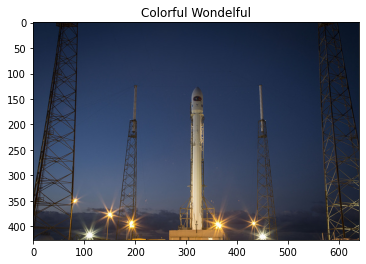

In [ ]:
from skimage import color 

rocket = data.rocket() 
print(rocket.shape)
gray_scaled_rocket = color.rgb2gray(rocket)

plt.imshow(rocket)
plt.title("Colorful Wondelful")

Text(0.5, 1.0, 'Gray boo')

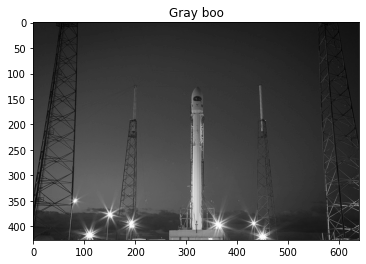

In [ ]:
plt.imshow(gray_scaled_rocket, cmap='gray')
plt.title("Gray boo")


In [ ]:
gray_scaled_rocket.shape

(427, 640)

In [ ]:
type(gray_scaled_rocket)

numpy.ndarray

In [ ]:
#picture is an array 
import numpy as np

In [ ]:
red = rocket[:,:,2]
green = rocket[:,:,1]
blue = rocket[:,:,0]

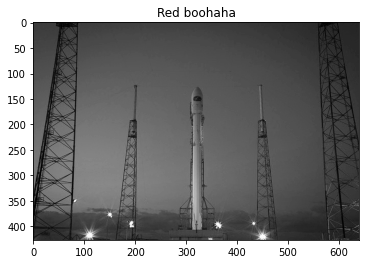

In [ ]:
# red[:,:,0]= 0
 
plt.title("Red boohaha")
plt.imshow(red, cmap='gray')
plt.show()


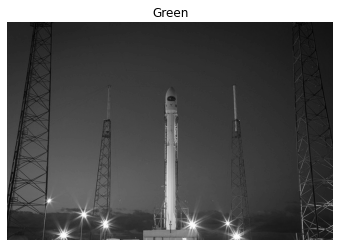

In [ ]:
plt.imshow(green, cmap="gray")
plt.title('Green')
plt.axis('off')
plt.show()

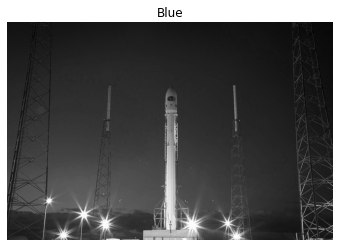

In [ ]:
plt.imshow(blue, cmap="gray")
plt.title('Blue')
plt.axis('off')
plt.show()

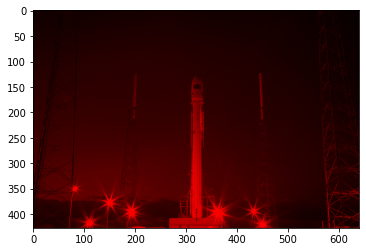

In [ ]:
# to get individual color intensities : 

b = rocket.copy()
# set green and red channels to 0
b[:, :, 1] = 0
b[:, :, 2] = 0


g = rocket.copy()
# set blue and red channels to 0
g[:, :, 0] = 0
g[:, :, 2] = 0

r = rocket.copy()
# set blue and green channels to 0
r[:, :, 0] = 0
r[:, :, 1] = 0


# RGB - Blue
plt.imshow(b,cmap='gray')



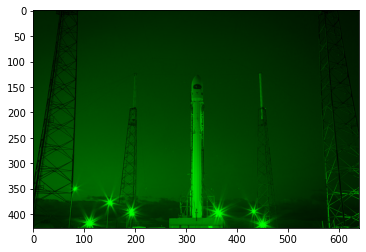

In [ ]:

# RGB - Green
plt.imshow(g,cmap='gray')

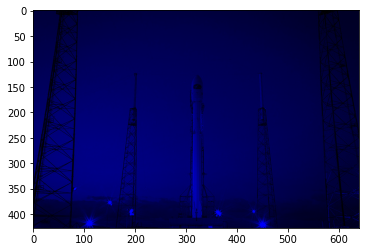

In [ ]:

# RGB - Red
plt.imshow(r,cmap='gray')

In [ ]:
r.shape

(427, 640, 3)

In [ ]:
r.size

819840

#Flipping Image


In [ ]:
#Upward direction 

my_photo = data.rocket()

# my_photo = my_photo[:,:,0]
vertical_flip= np.flipud(my_photo)

horizontally_flipped = np.fliplr(my_photo)



(427, 640, 3)

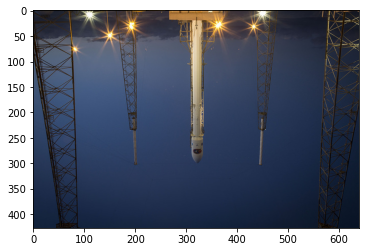

In [ ]:
plt.imshow(vertical_flip,cmap='gray')
my_photo.shape

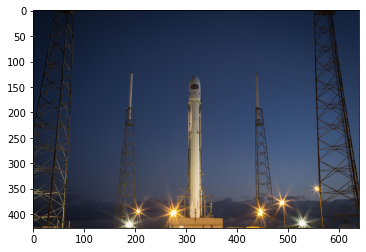

In [ ]:
plt.imshow(horizontally_flipped,cmap='gray')
# 4 light at right side, so flipped horizintally

#Histogram
An image histogram is a gray-scale value distribution showing the frequency of occurrence of each gray-level value. For an image size of 1024 × 1024 × 8 bits, the abscissa ranges from 0 to 255; the total number of pixels is equal to 1024 × 1024.

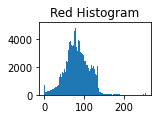

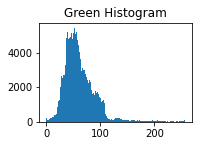

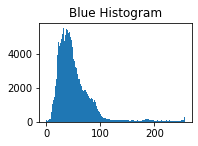

In [ ]:
# Extract the red channel
red_channel = my_photo[:,:,2]
green_channel = my_photo[:,:,1]
blue_channel = my_photo[:,:,0]

#creating subplots for clear vusualization 

plt.subplots_adjust(hspace=1, wspace=1)

plt.subplot(2,2,1)
# Plot the histogram
plt.title("Red Histogram")
plt.hist(red_channel.ravel(), 256, [0,256])
plt.show()


plt.subplot(2,2,2)
plt.title("Green Histogram")
plt.hist(green_channel.ravel(), 256, [0,256])
plt.show()

plt.subplot(2,2,3)
plt.title("Blue Histogram")
plt.hist(blue_channel.ravel(), 256, [0,256])
plt.show()

#Note: here 256 are bins and 0-255 is the range of the values of x axis

#Thresholding 
  

In [ ]:
threshold =127 # half of 255
# print(my_photo)

binary = my_photo > threshold


inverted_binary = my_photo<=threshold

# plt.imshow(binary, cmap='gray') 
# This should be working but binary contains T/F values rather than pixel intensity....

In [ ]:
# plt.imshow(i_v, cmap='gray')

In [ ]:
import cv2

In [ ]:
ret, thresh = cv2.threshold(my_photo, 127, 255, cv2.THRESH_BINARY)

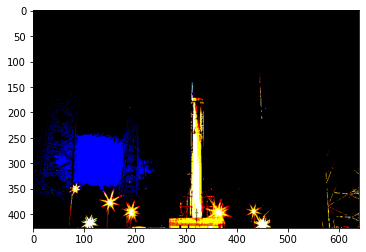

In [ ]:
plt.imshow(thresh, cmap='gray')

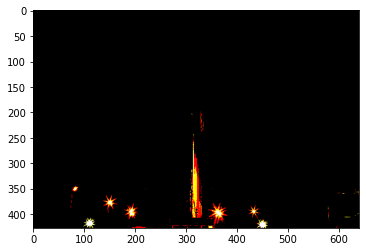

In [ ]:
ret, thresh = cv2.threshold(my_photo, 200, 255, cv2.THRESH_BINARY)
plt.imshow(thresh, cmap='gray')


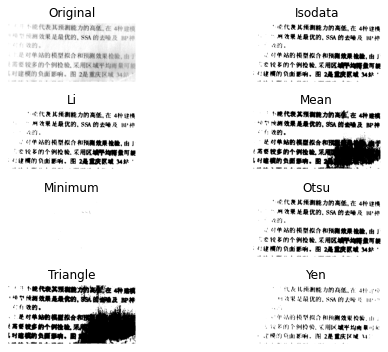

In [ ]:
from skimage.filters import try_all_threshold
image = plt.imread('Adaptive_thresholding.png')
img = cv2.cvtColor(image, cv2.COLOR_BGRA2BGR)
grayscale =color.rgb2gray(img)
# Obtain all the resulting images
fig, ax = try_all_threshold(grayscale, verbose=False)



# Showing resulting plots
# show_plot(fig, ax)
# print (fig) 

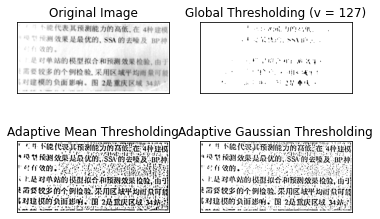

In [ ]:
img = cv2.imread('Adaptive_thresholding.png', cv2.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
img = cv2.medianBlur(img,5)
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)','Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

Get a optimal threshold value from the threshold_otsu module
"Global (Uniform background)"

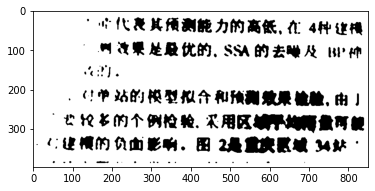

In [42]:
from skimage.filters import threshold_otsu

# Obtain the optimal threshold value
thresh = threshold_otsu(img)

# Apply thresholding to the image
binary_global = img > thresh

ret, thresh = cv2.threshold(img, 200, 255, cv2.THRESH_BINARY)
plt.imshow(thresh, cmap='gray')


Local (Uneven background)



In [46]:
# Import the local threshold function
from skimage.filters import threshold_local

# Set the block size to 35
block_size = 35

# Obtain the optimal local thresholding
local_thresh = threshold_local(img, block_size, offset=10)

# Apply local thresholding and obtain the binary image
binary_local = img > local_thresh


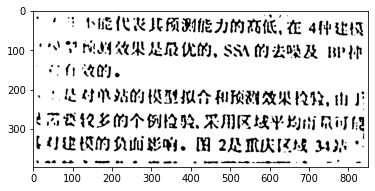

In [47]:
plt.imshow(binary_local, cmap='gray')


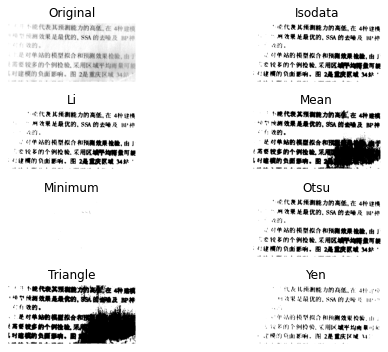

In [50]:
from skimage.filters import try_all_threshold

img= plt.imread('Adaptive_thresholding.png')
img = cv2.cvtColor(img, cv2.COLOR_BGRA2BGR)

grayscale = color.rgb2gray(img)

# Use the try all method on the resulting grayscale image
fig, ax = try_all_threshold(grayscale, verbose=False);